In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.rename( columns = {'rent amount (R$)': 'valor_aluguel'}, inplace=True)

In [5]:
df['valor_aluguel'].mean()

3896.247194163861

In [6]:
df['valor_aluguel'].median()

2661.0

In [7]:
df['valor_aluguel'].std()

3408.5455176710816

In [8]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

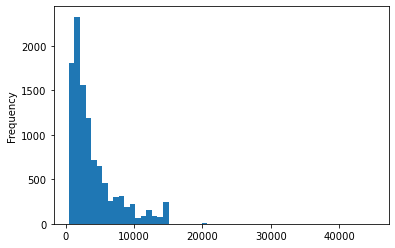

In [9]:
df['valor_aluguel'].plot(kind = 'hist', bins=55);

In [10]:
 df['valor_aluguel'].skew()

1.8388773035440982

In [11]:
df['valor_aluguel'].kurtosis()

4.624228179818687

In [12]:
#Qual a cidade com a média de aluguel mais alta?

df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel',ascending = False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [13]:
#Quantos banheiros existem em media nas residencias com aluguel mais alto?
## definição: alugueis mais altos são valores acima de 5000

df['aluguel_alto'] = ['alto' if x > 5000 else 'baixo' for x in df['valor_aluguel']]

In [14]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
alto     3.729027
baixo    1.772108
Name: bathroom, dtype: float64

In [15]:
#Os imoveis mais caros aceitam animais?  82% aceitam
(df.groupby('aluguel_alto')['animal'].get_group('alto').value_counts()['acept'] / df.groupby('aluguel_alto')['animal'].get_group('alto').value_counts().sum() ) * 100

82.07955888144939

In [16]:
#Os imoveis mais caros sao mobiliados? 34% dos imoveis são mobiliados
(df.groupby('aluguel_alto')['furniture'].get_group('alto').value_counts()['furnished'] / df.groupby('aluguel_alto')['furniture'].get_group('alto').value_counts().sum() ) * 100

34.58054352107129

## Hipoteses

In [39]:
#São Paulo é a cidade com o aluguel mais caro
df.groupby('city')['valor_aluguel'].mean()

city
Belo Horizonte    3664.127981
Campinas          2364.290739
Porto Alegre      2337.699916
Rio de Janeiro    3232.904064
São Paulo         4652.793783
Name: valor_aluguel, dtype: float64

In [21]:
#Quanto mais banheiros em um imovel maior o valor do aluguel
df[['valor_aluguel','bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [22]:
aux = pd.DataFrame({'colunas': df.columns, 'tipos': df.dtypes})

In [25]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [32]:
   df[['valor_aluguel', 'furniture']].corr(method = 'spearman')

,valor_aluguel
valor_aluguel,1.0


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

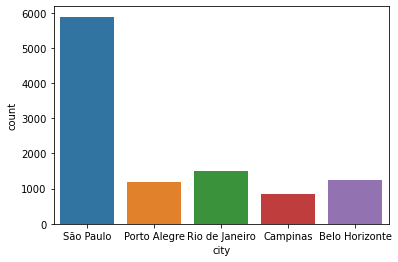

In [77]:
sns.countplot(x = 'city', data = df);

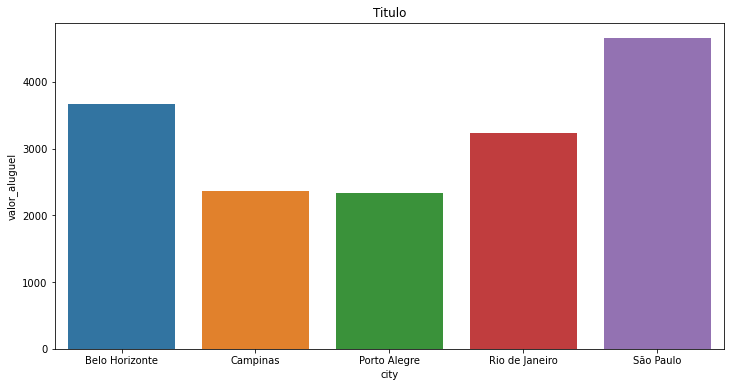

In [79]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'city', y='valor_aluguel', data =df.groupby('city')['valor_aluguel'].mean().reset_index())

plt.title('Titulo');

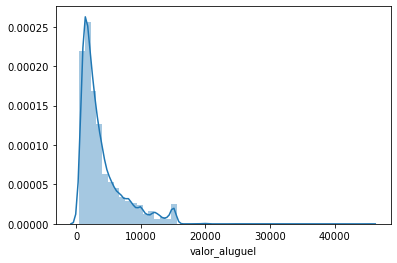

In [81]:
sns.distplot(df['valor_aluguel']);

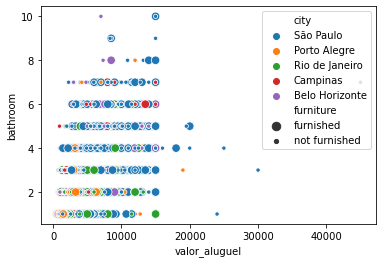

In [94]:
sns.scatterplot(x = 'valor_aluguel', y = 'bathroom', hue = 'city', size = 'furniture', data = df);

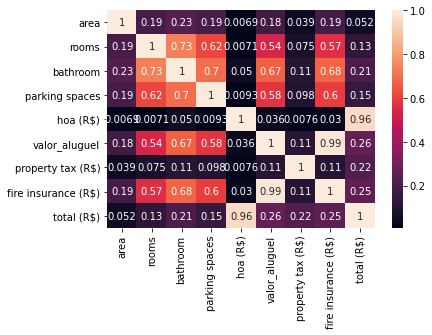

In [97]:
sns.heatmap(df.corr(), annot = True);

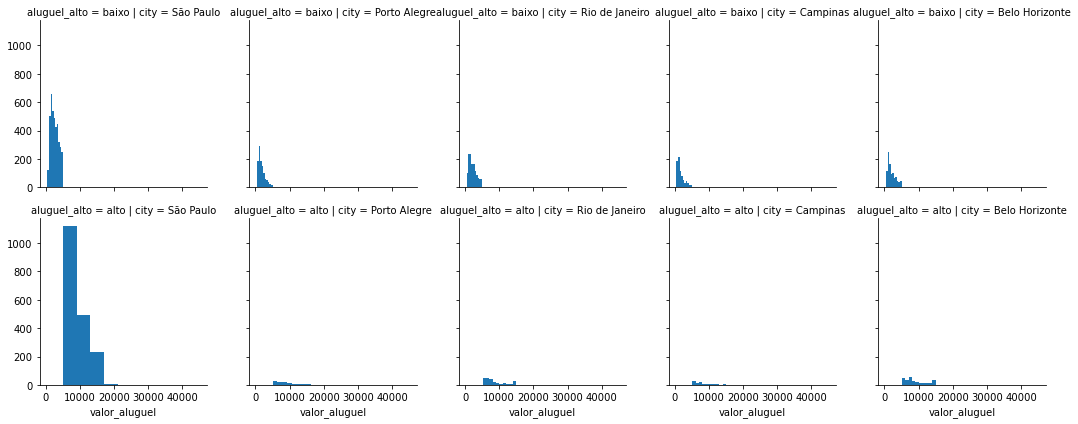

In [101]:
g = sns.FacetGrid(df, col='city', row='aluguel_alto')
g = g.map(plt.hist, 'valor_aluguel')